In [ ]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Loading Data
df = pd.read_csv('archive/index_1.csv')

In [ ]:
# Data wrangling
df['time'] = pd.to_datetime(df['datetime']).dt.strftime('%H:%M:%S') # Convert to DateTime format

# to group sales data by month and year
df['date'] = pd.to_datetime(df['date'])  # Convert date column
df['year_month'] = df['date'].dt.to_period('M')  # Creates "YYYY-MM" format

In [23]:
df.head()

,date,datetime,cash_type,card,money,coffee_name,time,year_month
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,10:15:50,2024-03
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:19:22,2024-03
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:20:18,2024-03
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,13:46:33,2024-03
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,13:48:14,2024-03


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3636 non-null   datetime64[ns]
 1   datetime     3636 non-null   object        
 2   cash_type    3636 non-null   object        
 3   card         3547 non-null   object        
 4   money        3636 non-null   float64       
 5   coffee_name  3636 non-null   object        
 6   time         3636 non-null   object        
 7   year_month   3636 non-null   period[M]     
dtypes: datetime64[ns](1), float64(1), object(5), period[M](1)
memory usage: 227.4+ KB


In [25]:
df.describe()

,date,money
count,3636,3636.000000
mean,2024-09-30 11:56:02.376237568,31.746859
min,2024-03-01 00:00:00,18.120000
25%,2024-07-03 00:00:00,27.920000
50%,2024-10-06 12:00:00,32.820000
75%,2025-01-08 00:00:00,35.760000
max,2025-03-23 00:00:00,40.000000
std,NaN,4.919926


In [26]:
df.duplicated().sum()  # Count duplicate rows

0

<Axes: title={'center': 'Daily Sales Trend'}, xlabel='date'>

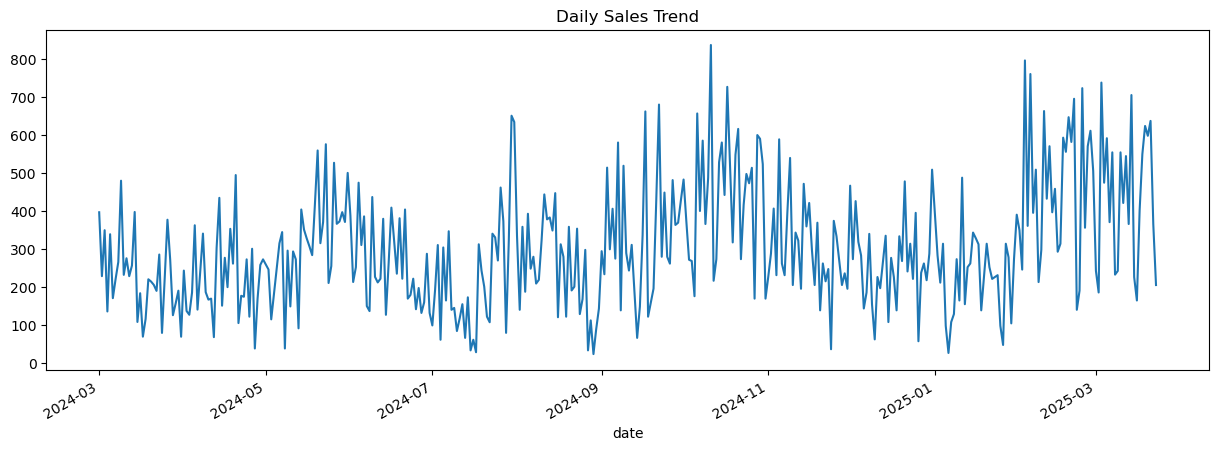

In [ ]:
# Total Sales throughout the year day by day
plt.figure(figsize=(15,5))
df.groupby('date')['money'].sum().plot(kind='line', title="Daily Sales Trend")

<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='year_month'>

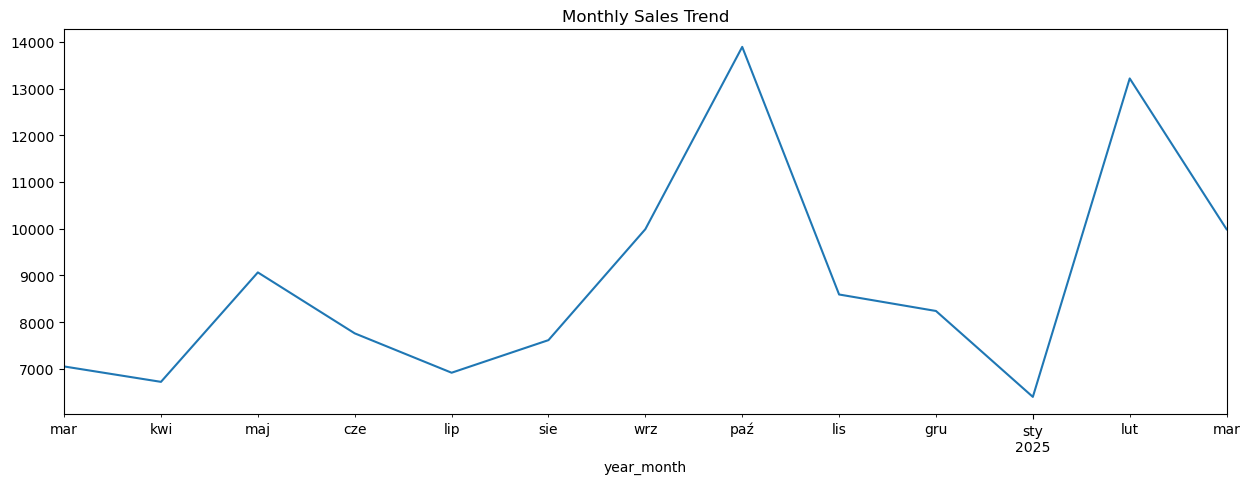

In [ ]:
# Total Sales throughout the year by months
plt.figure(figsize=(15,5))
df.groupby('year_month')['money'].sum().plot(kind='line', title="Monthly Sales Trend")